### 第一章 数学基础

In [3]:
import math
import numpy as np

#### 1.1向量和矩阵
##### 1.1.1标量，向量，矩阵，张量之间的关系

In [8]:
n = 3
value = 1
scalar = value
print("scalar:",scalar)
vector = [value] * n
print("a 3 dimensional vector:",vector)
matrix = [[value] * n] * n
print("3x3 matrix:",matrix)
tensor = np.ones((n,n,n))
print("3x3x3 tensor",tensor)

scalar: 1
a 3 dimensional vector: [1, 1, 1]
3x3 matrix: [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
3x3x3 tensor [[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


##### 1.1.4 向量和矩阵范数归纳
向量的范数

In [6]:
vec = [-5,6,8,-10]

In [7]:
def L1_norm(vec):
    return sum([abs(i) for i in vec])
L1_norm(vec)

29

In [12]:
def L2_norm(vec):
    return math.sqrt(sum([abs(i**2) for i in vec]))
L2_norm(vec)

15.0

In [15]:
def minus_inf_norm(vec):
    return min([abs(i) for i in vec])
minus_inf_norm(vec)

5

In [16]:
def inf_norm(vec):
    return max([abs(i) for i in vec])
inf_norm(vec)

10

In [34]:
def p_norm(vec,p):
    return math.pow(sum([math.pow(abs(i),p) for i in vec]),1/p)
p_norm(vec,1.5)

18.586072512249974

矩阵的范数

In [38]:
A = [[-1,2,-3],[4,-6,6]]

In [87]:
def matrix_L1_norm(mat):
    B = np.array(mat)
    return [sum(abs(B[:,i])) for i in range(len(mat[0]))]
matrix_L1_norm(A)

[5, 8, 9]

In [79]:
def matrix_L2_norm(mat):
    e,_ = np.linalg.eig(np.matmul(np.transpose(mat),mat))
    return np.sqrt(max(e))
matrix_L2_norm(A)

10.062274996520644

In [88]:
def matrix_inf_norm(mat):
    B = np.array(mat)
    return max([sum(abs(B[i,:])) for i in range(len(mat))])
matrix_inf_norm(A)

16

In [89]:
def matrix_svd_norm(mat):
    s,v,d = np.linalg.svd(mat)
    return sum(v)
matrix_svd_norm(A)

10.928659376802019

In [99]:
def matrix_L0_norm(mat):
    return np.count_nonzero(mat)
matrix_L0_norm(A)

6

In [107]:
def matrix_L1_norm(mat):
    return sum(sum(abs(np.array(mat))))
matrix_L1_norm(A)

22

In [115]:
def matrix_L2_norm(mat):#F
    return np.sqrt(sum(sum(np.array(A)**2)))
matrix_L2_norm(A)

10.099504938362077

In [164]:
def matrix_L21_norm(mat):
    return sum(np.sqrt([sum(abs(B[:,i]) ** 2) for i in range(len(A[0]))]))
matrix_L2_norm(A)

10.099504938362077

In [175]:
def matrix_p_norm(mat,p):
    return np.sqrt(sum(sum(abs(np.array(A))**p)))
matrix_p_norm(A,3.2)

27.321264091116483

##### 1.1.5 判断矩阵正定
求解特征值

In [9]:
eye_mat = np.eye(3)
eye_mat[2,2] = -1
eye_mat

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0., -1.]])

In [10]:
def check_positive_definite(mat):
    e,v = np.linalg.eig(mat)
    return True if len(e[e>=0]) == len(e) else False
check_positive_definite(eye_mat)

False

#### 1.2 导数和偏导数
##### 导数偏导计算
略

#### 1.3 特征值和特征向量
1.3.1 特征值分解与特征向量

In [12]:
fea = [[1,2,2],[3,1,2],[5,6,7]]

In [13]:
eigenvalues,eigenvectors = np.linalg.eig(fea)
print(eigenvalues)

[10.25782193 -1.33106165  0.07323972]


满足特性

In [15]:
print("first")
print(np.matmul(fea,eigenvectors[:,0]))
print(eigenvectors[:,0] * eigenvalues[0])
print("second")
print(np.matmul(fea,eigenvectors[:,1]))
print(eigenvectors[:,1] * eigenvalues[1])
print("third")
print(np.matmul(fea,eigenvectors[:,1]))
print(eigenvectors[:,1] * eigenvalues[1])

[2.6738351  2.9113442  9.46560044]
[2.6738351  2.9113442  9.46560044]

[-0.55203295  1.11542972 -0.4720183 ]
[-0.55203295  1.11542972 -0.4720183 ]


##### 1.3.2奇异值与特征值的关系

[参考](https://zhuanlan.zhihu.com/p/353637184)

- 特征向量是所有向量中经过线性变换(乘以变换矩阵)后，方向不变的向量，可能存在也可能不存在
- 奇异向量，每个维度拉伸效果最大的方向，一定存在

右奇异阵的转置和特征向量相等

In [33]:
s,v,d = np.linalg.svd(fea)
print("svd")
print(d.T)

eigs,vec = np.linalg.eig(np.matmul(np.transpose(fea),fea))
print("eigen vectors")
print(vec)

svd
[[-0.50398193 -0.81343046 -0.29040161]
 [-0.55504866  0.56262574 -0.61267712]
 [-0.66175765  0.14759117  0.7350467 ]]
eigen vectors
[[-0.50398193 -0.81343046 -0.29040161]
 [-0.55504866  0.56262574 -0.61267712]
 [-0.66175765  0.14759117  0.7350467 ]]


#### 1.4 概率分布与随机变量
- 概率质量函数：离散概率分布
- 概率密度函数：连续概率分布

#### 1.5常见概率分布
- 伯努利分布：0-1分布
- 高斯分布：正态分布
- 指数分布
- 拉普拉斯分布
- Dirac分布

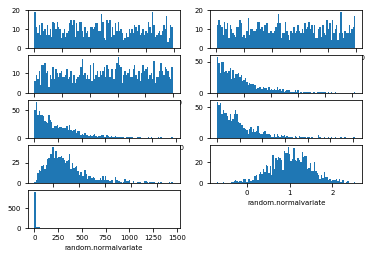

In [35]:
import random
import matplotlib
import matplotlib.pyplot as plt
SAMPLE_SIZE = 1000
buckets = 100
fig = plt.figure()
matplotlib.rcParams.update({"font.size": 7})
#第一个图形是在[0,1)之间分布的随机变量（normal distributed random variable）。
ax = fig.add_subplot(5,2,1)
ax.set_xlabel("random.random")
res = [random.random() for _ in range(1, SAMPLE_SIZE)]
ax.hist(res, buckets)
#第二个图形是一个均匀分布的随机变量（uniformly distributed random variable）。
ax_2 = fig.add_subplot(5,2,2)
ax_2.set_xlabel("random.uniform")
a = 1
b = SAMPLE_SIZE
res_2 = [random.uniform(a, b) for _ in range(1, SAMPLE_SIZE)]
ax_2.hist(res_2, buckets)
#第三个图形是一个三角形分布（triangular distribution）。
ax_3 = fig.add_subplot(5,2,3)
ax_3.set_xlabel("random.triangular")
low = 1
high = SAMPLE_SIZE
res_3 = [random.uniform(low, high) for _ in range(1, SAMPLE_SIZE)]
ax_3.hist(res_3, buckets)
#第四个图形是一个beta分布（beta distribution）。参数的条件是alpha 和 beta 都要大于0， 返回值在0~1之间。
plt.subplot(5,2,4)
plt.xlabel("random.betavariate")
alpha = 1
beta = 10
res_4 = [random.betavariate(alpha, beta) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_4, buckets)
#第五个图形是一个指数分布（exponential distribution）。 lambd 的值是 1.0 除以期望的中值，是一个不为零的数（参数应该叫做lambda没但它是python的一个保留字）。如果lambd是整数，返回值的范围是零到正无穷大；如果lambd为负，返回值的范围是负无穷大到零。
plt.subplot(5,2,5)
plt.xlabel("random.expovariate")
lambd = 1.0/ ((SAMPLE_SIZE + 1) / 2.)
res_5 = [random.expovariate(lambd) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_5, buckets)
#第六个图形是gamma分布（gamma distribution）， 要求参数alpha 和beta都大于零。
plt.subplot(5,2,6)
plt.xlabel("random.gammavariate")
alpha = 1
beta = 10
res_6 = [random.gammavariate(alpha, beta) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_6, buckets)
#第七个图形是对数正态分布（Log normal distribution）。如果取这个分布的自然对数，会得到一个中值为mu，标准差为sigma的正态分布。mu可以取任何值，sigma必须大于零。
plt.subplot(5,2,7)
plt.xlabel("random.lognormalvariate")
mu = 1
sigma = 0.5
res_7 = [random.lognormvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_7, buckets)
#第八个图形是正态分布（normal distribution）。
plt.subplot(5,2,8)
plt.xlabel("random.normalvariate")
mu = 1
sigma = 0.5
res_8 = [random.normalvariate(mu, sigma) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_8, buckets)
 
#最后一个图形是帕累托分布（Pareto distribution）， alpha 是形状参数。
plt.subplot(5,2,9)
plt.xlabel("random.normalvariate")
alpha = 1
res_9 = [random.paretovariate(alpha) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res_9, buckets)
plt.show()